In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
df = pd.read_excel('../input/insurance-fraud-detection/Worksheet in Case Study question 2.xlsx')

In [4]:
df1= pd.read_excel('../input/insurance-fraud-detection/Worksheet in Case Study question 2.xlsx')

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [6]:
#replace ? with NaN
df=df.replace('?',np.NaN)

In [7]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [8]:
fraud_reported = df['fraud_reported'].value_counts()

In [9]:
fraud_reported

N    753
Y    247
Name: fraud_reported, dtype: int64

In [10]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

In [11]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
fraud = df['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

In [13]:
label_fraud

Index(['N', 'Y'], dtype='object')

In [14]:
size_fraud

array([753, 247])

In [15]:
data = df.copy()

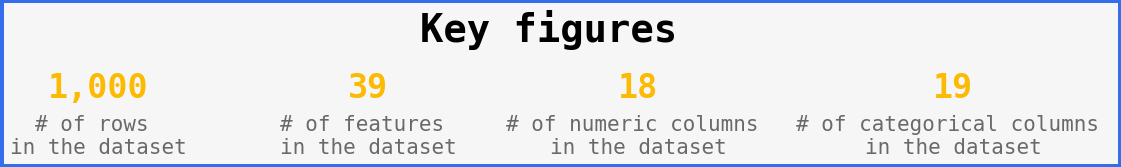

In [16]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
df_dtypes = data.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily=font, ha='center')

ax.text(0, 0.4, "{:,d}".format(data.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(0.6, 0.4, "{}".format(data.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.2, 0.4, "{}".format(len(data.select_dtypes(np.number).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax.text(1.9, 0.4,"{}".format(len(data.select_dtypes(object).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9, 0.001,"# of categorical columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

# ax.text(2.6, 0.4,"{}".format(len(data.select_dtypes('datetime').columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
# ax.text(1.9, 0.001,"# of datetime columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
ax.set_facecolor('#f6f6f6')

plt.show()

In [17]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [18]:
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-09-06
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-01-05
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [19]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [20]:
df['fraud_reported']

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 1000, dtype: int64

In [21]:
from category_encoders import TargetEncoder
import warnings
# Suppress only the FutureWarning related to smoothing
warnings.filterwarnings('ignore', category=FutureWarning)
encoder = TargetEncoder()
df['auto_model'] = encoder.fit_transform(df['auto_model'], df['fraud_reported'])

In [22]:
df['auto_model']

0      0.714286
1      0.740741
2      0.674419
3      0.625000
4      0.916664
         ...   
995    0.769231
996    0.727273
997    0.700000
998    0.656250
999    0.740741
Name: auto_model, Length: 1000, dtype: float64

In [23]:
df['auto_model'].value_counts()

0.714286    56
0.674419    43
0.880952    42
0.850000    40
0.729730    37
0.837838    37
0.777778    36
0.714286    35
0.727273    33
0.656250    32
0.843750    32
0.870968    31
0.900000    30
0.857143    28
0.814815    27
0.740741    27
0.629630    27
0.800000    25
0.760000    25
0.750000    24
0.708333    24
0.625000    24
0.869565    23
0.695652    23
0.590909    22
0.727273    22
0.636364    22
0.714286    21
0.800000    20
0.600000    20
0.700000    20
0.944444    18
0.611111    18
0.562500    16
0.666667    15
0.769231    13
0.916664    12
Name: auto_model, dtype: int64

In [24]:
df['auto_make'] = encoder.fit_transform(df['auto_make'], df['fraud_reported'])

In [25]:
df['auto_make']

0      0.775000
1      0.661538
2      0.750000
3      0.723684
4      0.808824
         ...   
995    0.745455
996    0.720588
997    0.762500
998    0.695652
999    0.661538
Name: auto_make, Length: 1000, dtype: float64

In [26]:
df['police_report_available'] = encoder.fit_transform(df['police_report_available'], df['fraud_reported'])

In [27]:
df['police_report_available']

0      0.770701
1      0.744898
2      0.744898
3      0.744898
4      0.744898
         ...   
995    0.744898
996    0.744898
997    0.770701
998    0.770701
999    0.744898
Name: police_report_available, Length: 1000, dtype: float64

In [28]:
df['property_damage'] = encoder.fit_transform(df['property_damage'], df['fraud_reported'])

In [29]:
df['incident_city'] = encoder.fit_transform(df['incident_city'], df['fraud_reported'])

In [30]:
df['incident_state'] = encoder.fit_transform(df1['incident_state'], df['fraud_reported'])

In [31]:
df['incident_state'] 

0      0.705645
1      0.772727
2      0.778626
3      0.565217
4      0.778626
         ...   
995    0.690909
996    0.705645
997    0.690909
998    0.778626
999    0.820276
Name: incident_state, Length: 1000, dtype: float64

In [32]:
df['authorities_contacted'] = encoder.fit_transform(df1['authorities_contacted'], df['fraud_reported'])

In [33]:
df['incident_severity'] = encoder.fit_transform(df1['incident_severity'], df['fraud_reported'])

In [34]:
df['collision_type'] = encoder.fit_transform(df1['collision_type'], df['fraud_reported'])

In [35]:
df['incident_type'] = encoder.fit_transform(df1['incident_type'], df['fraud_reported'])

In [36]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [37]:
df['insured_relationship'] = encoder.fit_transform(df1['insured_relationship'], df['fraud_reported'])

In [38]:
df['insured_hobbies'] = encoder.fit_transform(df1['insured_hobbies'], df['fraud_reported'])

In [39]:
df['insured_hobbies'] = encoder.fit_transform(df1['insured_hobbies'], df['fraud_reported'])

In [40]:
df['insured_occupation'] = encoder.fit_transform(df1['insured_occupation'], df['fraud_reported'])

In [41]:
df['insured_education_level'] = encoder.fit_transform(df1['insured_education_level'], df['fraud_reported'])

In [42]:
df['insured_sex'] = encoder.fit_transform(df1['insured_sex'], df['fraud_reported'])

In [43]:
df['policy_csl'] = encoder.fit_transform(df1['policy_csl'], df['fraud_reported'])

In [44]:
df['policy_state'] = encoder.fit_transform(df1['policy_state'], df['fraud_reported'])

In [45]:
df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [46]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,328,48,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,...,0.770701,71610,6510,13020,52080,0.775000,2004,0,1,25
1,228,42,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,...,0.744898,5070,780,780,3510,0.661538,2007,0,1,21
2,134,29,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,...,0.744898,34650,7700,3850,23100,0.750000,2007,1,2,22
3,256,41,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,...,0.744898,63400,6340,6340,50720,0.723684,2014,0,1,10
4,228,44,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,...,0.744898,6500,1300,650,4550,0.808824,2009,1,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0.741477,0.783333,1000,1310.80,0,431289,0.765363,0.776224,...,0.744898,87200,17440,8720,61040,0.745455,2006,1,2,22
996,285,41,0.772189,0.742120,1000,1436.79,0,608177,0.765363,0.736000,...,0.744898,108480,18080,18080,72320,0.720588,2015,1,1,24
997,130,34,0.741477,0.737892,500,1383.49,3000000,442797,0.765363,0.776224,...,0.770701,67500,7500,7500,52500,0.762500,1996,1,1,23
998,458,62,0.772189,0.783333,2000,1356.92,5000000,441714,0.738661,0.765517,...,0.770701,46980,5220,5220,36540,0.695652,1998,1,2,26


In [47]:
x3 = df.drop(['fraud_reported'], axis = 1)
y3 = df['fraud_reported']

print("Shape of x2 :", x3.shape)
print("Shape of y2 :", y3.shape)

Shape of x2 : (1000, 35)
Shape of y2 : (1000,)


In [48]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    #print(dataset[colname])
    return dataset
xnew=correlation(x3,0.9)
xnew.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,incident_month,incident_day
0,328,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,0.702703,...,1,2,0.770701,71610,6510,13020,0.775000,2004,1,25
1,228,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,0.763441,...,0,0,0.744898,5070,780,780,0.661538,2007,1,21
2,134,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,0.723684,...,2,3,0.744898,34650,7700,3850,0.750000,2007,2,22
3,256,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,0.753623,...,1,2,0.744898,63400,6340,6340,0.723684,2014,1,10
4,228,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,0.723684,...,0,1,0.744898,6500,1300,650,0.808824,2009,2,17


In [49]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [50]:
#xnew1=backwardElimination(xnew,y3,0.05,xnew.columns)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming xnew and y3 are your preprocessed data and labels
X_train, X_test, y_train, y_test = train_test_split(xnew, y3, test_size=0.3, random_state=42)

In [54]:
# Scale the data (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test_scaled)


In [56]:
# Calculate the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test_scaled)[:, 1])

In [57]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Accuracy: 0.7900
Precision: 0.8458
Recall: 0.8727
F1-Score: 0.8591
AUC-ROC: 0.8388
